In [61]:
# Import libraries
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder #LabelEncoder can be used to normalize labels
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

#### First, we're building dataframe (file name, and speaker number), and getting the features from the baseline data

#### We're then going to use this as our training set for use in the neural network

In [62]:
# List the files from baseline voice files; put them in a dataframe


#1.) Original # Orginal is trainFileList = os.listdir('../pickles/W_Alone_Loud_Envo')
#trainFileList = os.listdir('../pickles/W_Alone_Loud_Envo')


#my edits the original Train list had issue finding the path
trainFileList = os.listdir('C:/Users/Winfred/PycharmProjects/SocioApp-Keras-NN/pickles/initial_testing_data/W_Peer_Loud_Envo')
train_df = pd.DataFrame(trainFileList)


In [63]:
# Rename first column to file
train_df = train_df.rename(columns={0: 'file'})
train_df.head()


,file
0,Aaron_dune1_100_features.pkl
1,Aaron_dune1_101_features.pkl
2,Aaron_dune1_102_features.pkl
3,Aaron_dune1_103_features.pkl
4,Aaron_dune1_104_features.pkl


In [64]:
# Define train data directory
trainDataPath = '../pickles/initial_testing_data/W_Peer_Loud_Envo/'

# Get train data into dataframe
train_feature_labels = pd.concat([pd.read_pickle(trainDataPath + x) for x in os.listdir(trainDataPath)], ignore_index=True)

In [65]:
# Look at data
train_feature_labels.head()

0    ([-470.53073, 111.61264, -9.462243, 27.113188,...
1    ([-457.92657, 124.0556, -14.402865, 30.826015,...
2    ([-453.45758, 104.941536, -12.676239, 32.43918...
3    ([-483.15698, 115.74337, -5.365329, 24.174786,...
4    ([-475.36267, 124.66454, -14.640922, 27.704105...
dtype: object

In [66]:
# "We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network"
train_features = []
for i in range(0, len(train_df)):
    train_features.append(np.concatenate((train_feature_labels[i][0], train_feature_labels[i][1],
                train_feature_labels[i][2], train_feature_labels[i][3],
                train_feature_labels[i][4]), axis=0))

In [67]:
# Shuffle the dataframe
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [68]:
# Make sure the number of features matches
print("Features Size: \t" + str(len(train_features)))
print("Dataframe Size: \t" + str(len(train_df)))

Features Size: 	1179
Dataframe Size: 	1179


In [69]:
train_speakers = []
for i in range(0, len(train_df)):
    train_speakers.append(train_df['file'][i].split('_')[0].strip('s'))

In [70]:
# Append the speaker list to the data
train_df['speaker'] = train_speakers


In [71]:
# Look at data
train_df.head()

,file,speaker
0,winfred_PL_sc2_0_features.pkl,winfred
1,winfred_PL_sc1_p2_2_features.pkl,winfred
2,Aaron_dune1_97_features.pkl,Aaron
3,winfred_PL_Harvard_83_features.pkl,winfred
4,winfred_PL_Harvard_53_features.pkl,winfred


In [72]:
# Check the number of unique speakers in the data
print("Number of unique speakers: " + str(train_df['speaker'].nunique()))

Number of unique speakers: 2


In [73]:
# Making new var that holds just the speaker list
train_labels = train_speakers
# Look at the length, making sure it's the same as the features
len(train_labels)

1179

#### Hot encoding y and pre-processing X and y

In [74]:
X = np.array(train_features)
y = np.array(train_labels)

In [75]:
# Hot encoding y
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

In [76]:
X.shape

(1179, 193)

In [77]:
y.shape

(1179, 2)

In [78]:
# Define what index is 70% of the data (we will split this into the train and val data sets.)
# Note: we aren't doing test as of right now, because we have separate data for that
seventyPercIndex = round(train_feature_labels.size * .70)
print(seventyPercIndex)

825


In [79]:
# Put the first 70% of the data into the train arrays (X and y)
# X_train contains the features
X_train = X[:seventyPercIndex]
# y_train contains the labels, specifically the speaker/subject #
y_train = y[:seventyPercIndex]

# Note: It seems that the y set has been transformed into binary labels, which will have to be addressed later when we
#   add more speakers!!!

In [80]:
# Do the same, except for the rest of the data after 70% index
X_val = X[seventyPercIndex:]
y_val = y[seventyPercIndex:]

In [81]:
# Compare the shapes of the datasets, just to be sure they match up correctly
print("X_train Shape: \t" + str(X_train.shape))
print("X_val Shape: \t" + str(X_val.shape))

X_train Shape: 	(825, 193)
X_val Shape: 	(354, 193)


In [82]:
# Similar as above, just with the y data sets
print("y_train Shape: \t" + str(y_train.shape))
print("y_val Shape: \t" + str(y_val.shape))


y_train Shape: 	(825, 2)
y_val Shape: 	(354, 2)



---
#### Do the same as we just did, but for the testing data set



In [83]:
# List the files from use case voice files; put them in a dataframe
testFileList = os.listdir('../pickles/initial_testing_data/W_Peer_Loud_EnvoTestData')
test_df = pd.DataFrame(testFileList)


In [84]:
# Rename first column to file
test_df = test_df.rename(columns={0: 'file'})
test_df.head()


,file
0,Aaron_dune1_0_features.pkl
1,Aaron_dune1_1_features.pkl
2,Aaron_dune1_2_features.pkl
3,Aaron_dune1_3_features.pkl
4,Aaron_dune1_4_features.pkl


In [85]:
# Define test data directory
testDataPath = '../pickles/initial_testing_data/W_Peer_Loud_EnvoTestData/'
# Get test data into dataframe
test_feature_labels = pd.concat([pd.read_pickle(testDataPath + x) for x in os.listdir(testDataPath)], ignore_index=True)

In [86]:
# Look at data
test_feature_labels.head()


0    ([-460.9837, 118.47729, -8.905749, 30.198755, ...
1    ([-445.96765, 121.532616, -11.333506, 27.77086...
2    ([-451.21338, 115.38102, -12.55727, 26.25971, ...
3    ([-438.39185, 115.80861, -9.139274, 25.613058,...
4    ([-446.0187, 118.01115, -10.375266, 26.254034,...
dtype: object

In [87]:
# "We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network"
test_features = []
for i in range(0, len(test_df)):
    test_features.append(np.concatenate((test_feature_labels[i][0], test_feature_labels[i][1],
                test_feature_labels[i][2], test_feature_labels[i][3],
                test_feature_labels[i][4]), axis=0))


In [88]:
# Shuffle the dataframe
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [89]:
# Make sure the number of features matches
print("Features Size:\t" + str(len(test_features)))
print("Dataframe Size:\t" + str(len(test_df)))

Features Size:	20
Dataframe Size:	20


In [90]:
test_speakers = []
for i in range(0, len(test_df)):
    test_speakers.append(test_df['file'][i].split('_')[0].strip('s'))

In [91]:
# Append the speaker list to the data
test_df['speaker'] = test_speakers


In [92]:
# Look at data
test_df.head()


,file,speaker
0,winfred_PL_Harvard_31_features.pkl,winfred
1,Aaron_dune1_0_features.pkl,Aaron
2,winfred_PL_sc2_86_features.pkl,winfred
3,winfred_PL_sc1_88_features.pkl,winfred
4,Aaron_dune3_42_features.pkl,Aaron


In [93]:
# Check the number of unique speakers in the data
print("Number of unique speakers: " + str(test_df['speaker'].nunique()))

Number of unique speakers: 2


In [94]:
# Making new var that holds just the speaker list
test_labels = test_speakers
# Look at the length, making sure it's the same as the features
len(test_labels)


20

#### Hot encoding y and pre-processing X and y (test data now)

In [95]:
X_test = np.array(test_features)
y_test = np.array(test_labels)

In [96]:
# Hot encoding y
lb = LabelEncoder()
y_test = to_categorical(lb.fit_transform(y_test))

In [97]:
# Look at the shapes of our newly created data
print("X_test Shape:\t" + str(X_test.shape))
print("y_test Shape:\t" + str(y_test.shape))

X_test Shape:	(20, 193)
y_test Shape:	(20, 2)


In [98]:
# Compare all the sets of data thus far
print("X_train Shape:\t" + str(X_train.shape))
print("X_val Shape:\t" + str(X_val.shape))
print("X_test Shape:\t" + str(X_test.shape))

X_train Shape:	(825, 193)
X_val Shape:	(354, 193)
X_test Shape:	(20, 193)


In [99]:
print("y_train Shape:\t" + str(y_train.shape))
print("y_val Shape:\t" + str(y_val.shape))
print("y_test Shape:\t" + str(y_test.shape))

y_train Shape:	(825, 2)
y_val Shape:	(354, 2)
y_test Shape:	(20, 2)


In [100]:
# Do more transformation with standard scaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


---
#### Now we move onto the creation of the model



In [101]:
model = Sequential()

# The input layer, taking in the 193 features
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

# Internal layer (TODO: change density of layer), I can mess with this one
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

# Output layer - the final guess the NN makes (aka what speaker it thinks it is)
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') #mkk

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [102]:
import os
history = model.fit(X_train, y_train, batch_size=5, epochs=9,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
# I can mess with this cell 7 10
# this mod needs to go in a for loop outer for loop=> 1-10 and inner for loop 1-10 so we get accuracy
#myfile = open("batch size vs Epoch.txt","w")
"""myfile.write("batch size            Epoch               Prediction")
for i in range(1, 11):
    for j in range(1, 11):
        history = model.fit(X_train, y_train, batch_size=i, epochs=j,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
        #predict =1-round(len(test_df[test_df['speaker'] != test_df['prediction']])/len(test_df),3)
       # myfile.write(str(i)+"              " +str(j)+ "              " +str(predict))
myfile.close()
# rounds to 3rd # hundreths spot"""

Epoch 1/9
165/165 [==============================] - 1s 3ms/step - loss: 0.8583 - accuracy: 0.5394 - val_loss: 0.9909 - val_accuracy: 0.5734
Epoch 2/9
165/165 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6191 - val_loss: 0.8878 - val_accuracy: 0.5847
Epoch 3/9
165/165 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5944 - val_loss: 1.2485 - val_accuracy: 0.5876
Epoch 4/9
165/165 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6432 - val_loss: 0.7746 - val_accuracy: 0.5763
Epoch 5/9
165/165 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6704 - val_loss: 0.8564 - val_accuracy: 0.5480
Epoch 6/9
165/165 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.6955 - val_loss: 0.7413 - val_accuracy: 0.5678
Epoch 7/9
165/165 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6621 - val_loss: 0.9979 - val_accuracy: 0.5904
Epoch 8/9
165

'myfile.write("batch size            Epoch               Prediction")\nfor i in range(1, 11):\n    for j in range(1, 11):\n        history = model.fit(X_train, y_train, batch_size=i, epochs=j,\n                    validation_data=(X_val, y_val),\n                    callbacks=[early_stop])\n        #predict =1-round(len(test_df[test_df[\'speaker\'] != test_df[\'prediction\']])/len(test_df),3)\n       # myfile.write(str(i)+"              " +str(j)+ "              " +str(predict))\nmyfile.close()\n# rounds to 3rd # hundreths spot'

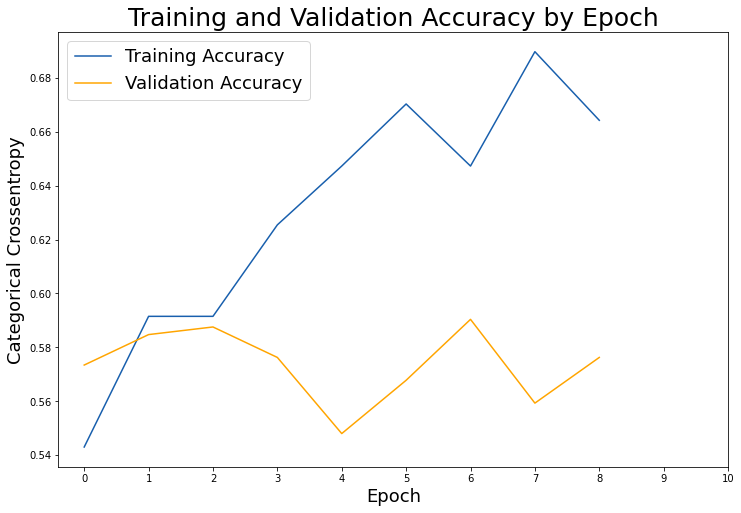

In [103]:
import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,11,1), range(0,11,1))

plt.legend(fontsize = 18);

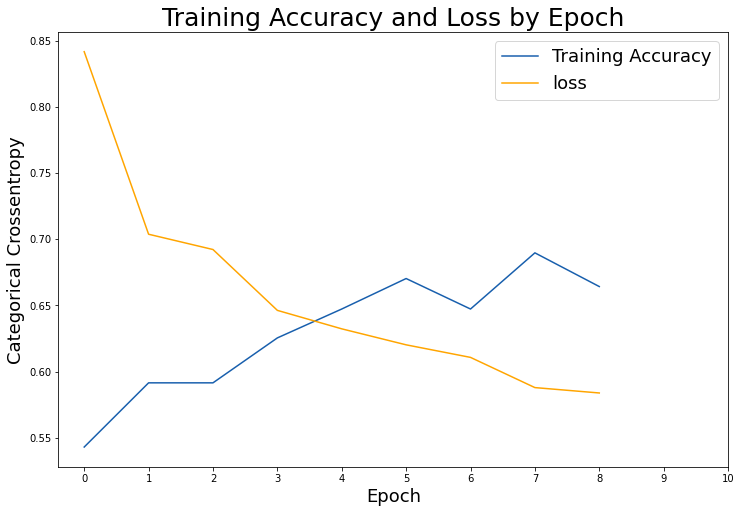

In [104]:
#I have to create 2 more graphs   1.)Accuracy vs Epoch 2.) Error vs Epoch
#Find where the error is zero and that the epoch we will use

import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
loss = history.history['loss']


# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(loss, label='loss', color='orange')

# Set title
plt.title('Training Accuracy and Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,11,1), range(0,11,1))

plt.legend(fontsize = 18);


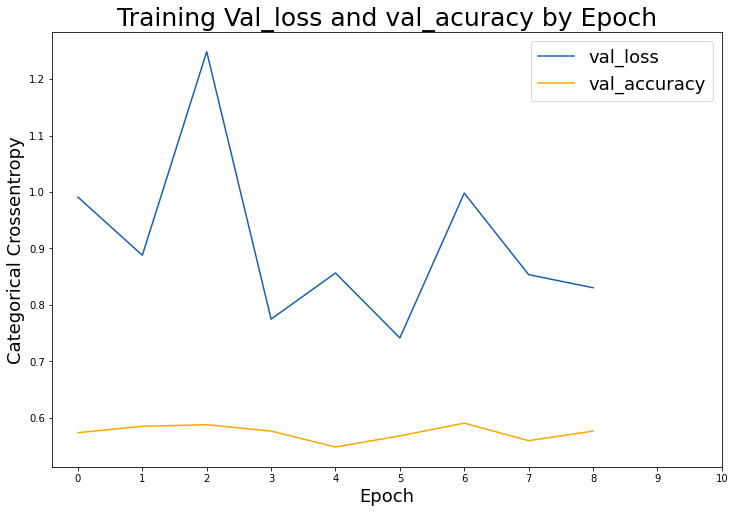

In [105]:

import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(val_loss, label='val_loss', color='#185fad')
plt.plot(val_accuracy, label='val_accuracy', color='orange')

# Set title
plt.title('Training Val_loss and val_acuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,11,1), range(0,11,1))

plt.legend(fontsize = 18);


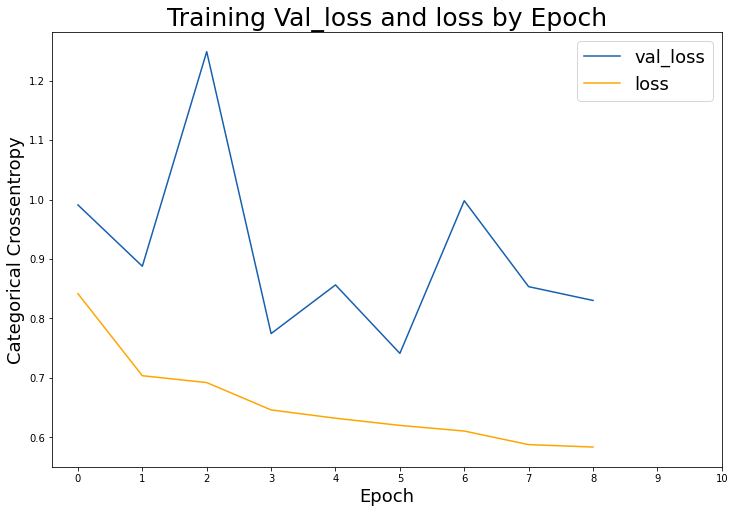

In [106]:
import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss =history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(val_loss, label='val_loss', color='#185fad')
plt.plot(loss, label='loss', color='orange')

# Set title
plt.title('Training Val_loss and loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,11,1), range(0,11,1))

plt.legend(fontsize = 18);

In [107]:
# Get predictions from the test data
predictions = model.predict_classes(X_test) #mkk

C:\Users\Winfred\anaconda3\envs\socioAppEnv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [108]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)#mkk

In [109]:
test_df['prediction'] = predictions#mkk

In [110]:
# Look at how the predictions match up
test_df

,file,speaker,prediction
0,winfred_PL_Harvard_31_features.pkl,winfred,winfred
1,Aaron_dune1_0_features.pkl,Aaron,winfred
2,winfred_PL_sc2_86_features.pkl,winfred,winfred
3,winfred_PL_sc1_88_features.pkl,winfred,winfred
4,Aaron_dune3_42_features.pkl,Aaron,winfred
5,winfred_PL_sc1_89_features.pkl,winfred,Aaron
6,Aaron_dune3_40_features.pkl,Aaron,Aaron
7,winfred_PL_Harvard_33_features.pkl,winfred,Aaron
8,Aaron_harvard_sentences1_features.pkl,Aaron,winfred
9,winfred_PL_Harvard_32_features.pkl,winfred,winfred


In [111]:
# Checking our model accuracy
1-round(len(test_df[test_df['speaker'] != test_df['prediction']])/len(test_df),3)

0.44999999999999996

In [112]:


myfile = open("W_Peer_Loud_Envo Batch vs Epoch.txt","w")
myfile.write("batch size            Epoch               Prediction"+ "\n")
for i in range(1, 11):
    #predict =1-round(len(test_df[test_df['speaker'] != test_df['prediction']])/len(test_df),3)
    #model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') #mkk
    #early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')


    for j in range(1, 11):

        predictions = model.predict_classes(X_test)

        predictions = lb.inverse_transform(predictions)
        test_df['prediction'] = predictions
        history = model.fit(X_train, y_train, batch_size=i, epochs=j,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
        predict =1-round(len(test_df[test_df['speaker'] != test_df['prediction']])/len(test_df),3)
        myfile.write(str(i)+"                       " +str(j)+ "                     " +str(predict)+ "\n")
myfile.close()

C:\Users\Winfred\anaconda3\envs\socioAppEnv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


825/825 [==============================] - 2s 2ms/step - loss: 0.7420 - accuracy: 0.6158 - val_loss: 0.9567 - val_accuracy: 0.5621
Epoch 1/2
825/825 [==============================] - 2s 2ms/step - loss: 0.6578 - accuracy: 0.6279 - val_loss: 0.8200 - val_accuracy: 0.5791
Epoch 2/2
825/825 [==============================] - 3s 3ms/step - loss: 0.6540 - accuracy: 0.6218 - val_loss: 0.6989 - val_accuracy: 0.5650
Epoch 1/3
825/825 [==============================] - 2s 3ms/step - loss: 0.6315 - accuracy: 0.6485 - val_loss: 0.9807 - val_accuracy: 0.5876
Epoch 2/3
825/825 [==============================] - 2s 2ms/step - loss: 0.6202 - accuracy: 0.6485 - val_loss: 0.7709 - val_accuracy: 0.5847
Epoch 3/3
825/825 [==============================] - 2s 2ms/step - loss: 0.6120 - accuracy: 0.6582 - val_loss: 0.8921 - val_accuracy: 0.5847
Epoch 1/4
825/825 [==============================] - 2s 2ms/step - loss: 0.5911 - accuracy: 0.6836 - val_loss: 0.7613 - val_accuracy: 0.5198
Epoch 2/4
825/825 [====